In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)
library(igraph)
library(BiocParallel)
library(SingleCellExperiment)
library(Matrix)
library(dplyr)
#library(MouseGastrulationData)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [2]:
load('/home/jovyan/scripts/renal_covid_19/steroid_pipeline/steroid_pos_only.RData')

In [3]:
steroid_pos_only_no_knnx


class: SingleCellExperiment 
dim: 1215 12802 
metadata(17): 5_subcluster_colors 9_subcluster ... pca umap
assays(1): X
rownames(1215): HES4 ISG15 ... MT-ND6 MT-CYB
rowData names(11): mt n_cells_by_counts ... mean std
colnames(12802): UK-CIC10690315+UK-CIC10690507_AAATGCCAGGCACATG-1
  UK-CIC10690315+UK-CIC10690507_AACTCTTCACTATCTT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTGCGTCAGTGGTAAT-1
  UK-CIC10690384+UK-CIC10690576_TTTCCTCCACCAGCAC-1
colData names(46): annotation22_ES centre ... time_from_positive_swab
  time_from_infection
reducedDimNames(3): PCA X_pca_harmony_orig.ident UMAP
mainExpName: NULL
altExpNames(0):

In [4]:
data_milo <-Milo(steroid_pos_only_no_knnx)

In [5]:
data_milo <- buildGraph(data_milo, k = 30, d = 30, reduced.dim = "X_pca_harmony_orig.ident") 

Constructing kNN graph with k:30



In [6]:
data_milo <- makeNhoods(data_milo, prop = 0.1, k = 30, d=30, refined = TRUE, reduced_dims = "X_pca_harmony_orig.ident")

Checking valid object



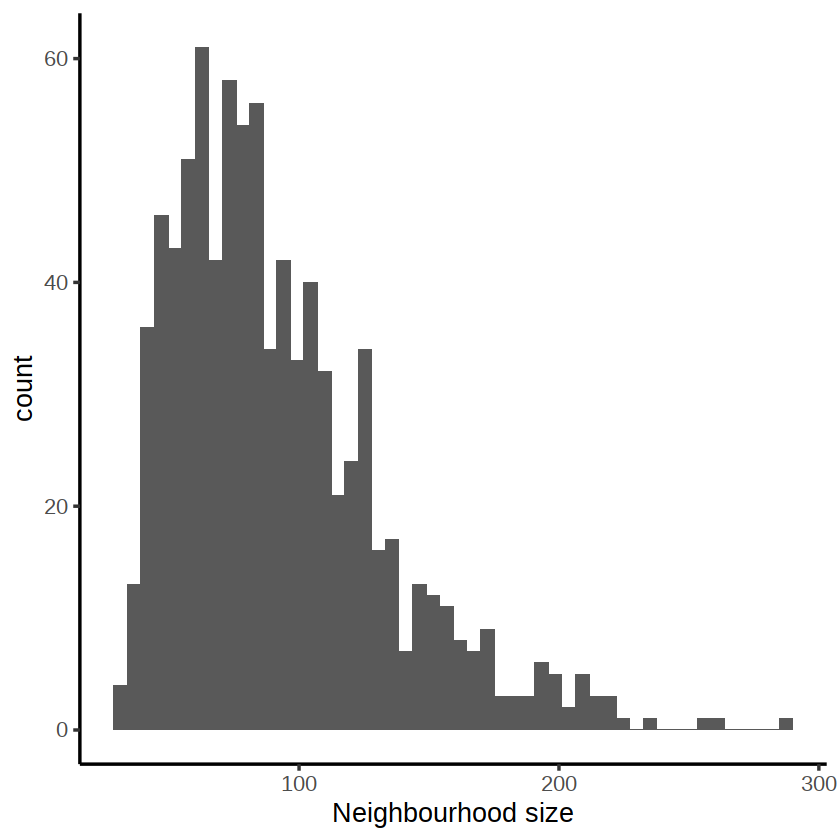

In [7]:
plotNhoodSizeHist(data_milo)

In [8]:
length(unique(rownames(data_milo)))

[1] 1215

In [9]:
data_milo <- countCells(data_milo, meta.data = as.data.frame(colData(data_milo)), sample="sample_id")

Checking meta.data validity

Counting cells in neighbourhoods



In [11]:
head(nhoodCounts(data_milo))

   [[ suppressing 31 column names ‘C101_060121’, ‘C101_110121’, ‘C101_130121’ ... ]]



6 x 31 sparse Matrix of class "dgCMatrix"
                                                                      
1 1 .  3 . .  . . .  5 . . 4 1 . . . 26 7 2 6 . . 46 2 . .  3  5 . . .
2 . 2  . . .  . . 3 18 7 1 . . . . .  1 3 1 2 . .  3 2 . .  . 11 4 1 .
3 . 2  5 1 2  1 . 1 36 3 . 2 . . . . 20 2 1 7 . . 33 1 1 1  3  4 . . 1
4 . 3 31 3 4  1 . 1  9 . . 1 . . . . 12 2 . . . . 25 . . .  4  3 . . .
5 1 . 10 1 5  . 1 1 26 . . 1 . . . 1 46 3 . 4 . 3 51 1 . 1 60  5 . 1 .
6 . 1 15 . 4 13 . .  . . . . . 1 5 .  . . . . . 4  . . 1 7 21  . . . 1

In [12]:
data_design <- data.frame(colData(data_milo))[,c("sample_id", "steroid_timeline_new",'time_from_infection')]


In [13]:
dim(data_design)

[1] 12802     3

In [14]:
data_design <- distinct(data_design)
dim(data_design)

[1] 31  3

In [15]:
rownames(data_design) <- data_design$sample_id

In [16]:
data_milo <- calcNhoodDistance(data_milo, d=30, reduced.dim = "X_pca_harmony_orig.ident")

In [17]:
da_results <- testNhoods(data_milo, design = ~time_from_infection+steroid_timeline_new, design.df = data_design, reduced.dim="X_pca_harmony_orig.ident")
head(da_results)

Warning message in testNhoods(data_milo, design = ~time_from_infection + steroid_timeline_new, :
“Sample names in design matrix and nhood counts are not matched. Reordering”
Using TMM normalisation

Warning message in max(abs(logR)):
“no non-missing arguments to max; returning -Inf”
Performing spatial FDR correction withk-distance weighting



,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.5494253,11.75222,2.16269700,0.1414093573,0.228918321,1,0.227681388
2,-3.5106895,11.36078,13.86243013,0.0001971385,0.004500964,2,0.004535852
3,-3.0864959,11.87169,9.64221353,0.0019037608,0.017740245,3,0.017887544
4,-0.3650179,11.34557,0.09330562,0.7600187006,0.818920150,4,0.817357035
5,-2.9326797,12.17548,4.49514727,0.0340013592,0.083227109,5,0.082796959
6,3.4634210,10.70533,8.80121701,0.0030132460,0.020785337,6,0.020788565


In [18]:
da_results %>%
  arrange(SpatialFDR) %>%
  head()

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
821,-7.873697,11.59731,38.66941,5.102473e-10,4.398331e-07,821,4.359496e-07
536,-6.781768,11.69853,28.95218,7.487789e-08,3.227237e-05,536,3.235440e-05
323,-5.332274,11.15367,27.40111,1.667197e-07,4.790413e-05,323,5.055931e-05
508,-4.863002,11.67543,26.45594,2.717252e-07,5.855678e-05,508,5.971311e-05
461,-4.495405,11.75495,24.36664,8.016681e-07,1.382076e-04,461,1.396990e-04
227,-5.002379,11.34950,23.05189,1.586320e-06,2.279012e-04,227,2.316625e-04


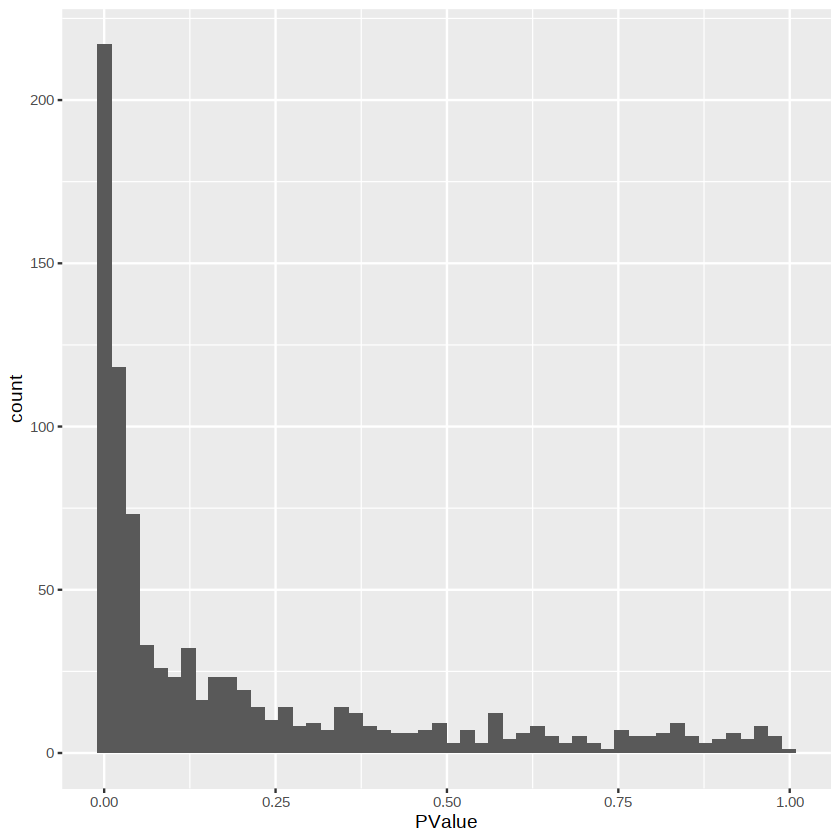

In [19]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=50)

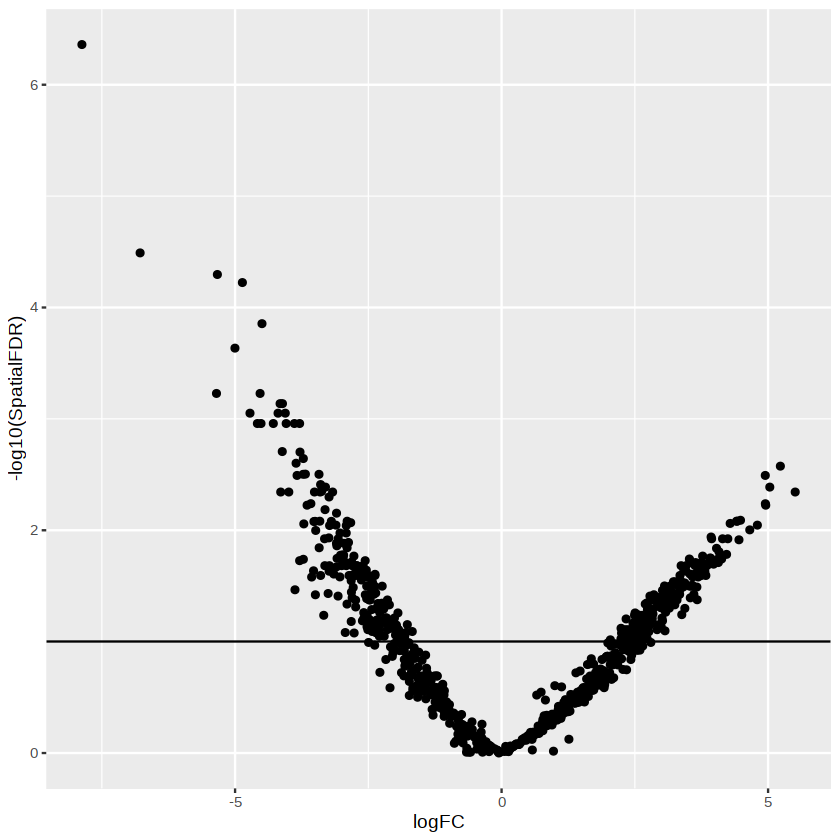

In [20]:
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

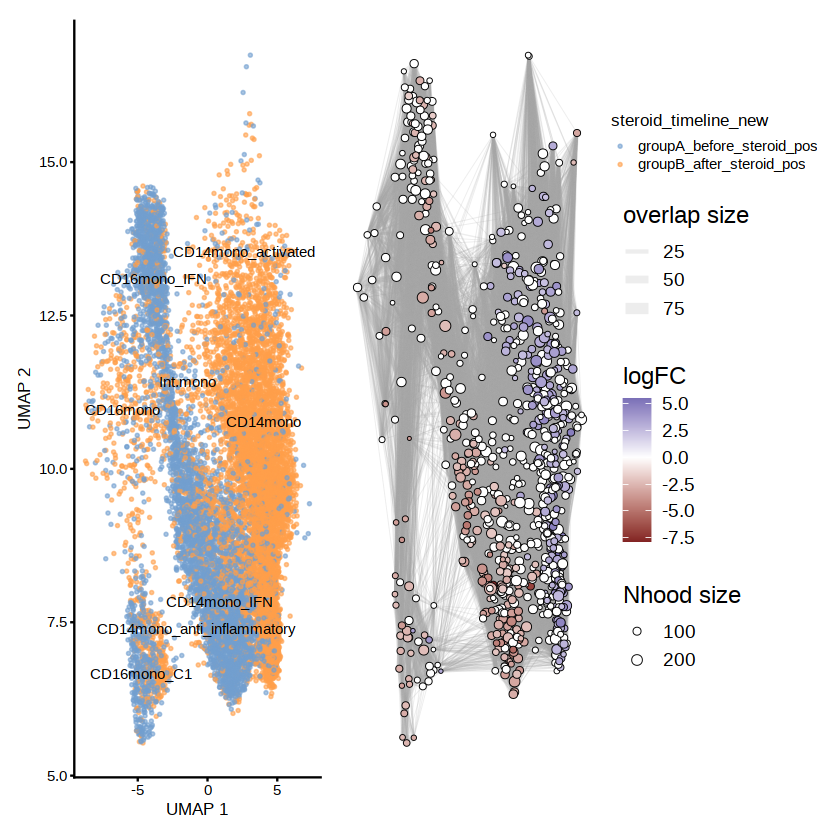

In [21]:
data_milo <- buildNhoodGraph(data_milo)

## Plot single-cell UMAP
umap_pl <- plotReducedDim(data_milo, dimred = "UMAP", colour_by="steroid_timeline_new", text_by = "annot4", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")

## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(data_milo, da_results, layout="UMAP",alpha=0.1) 
  
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [22]:
unique(data_milo$annot4)

[1] CD14mono_anti_inflammatory CD16mono                  
[3] CD14mono                   CD14mono_IFN              
[5] CD16mono_IFN               CD16mono_C1               
[7] Int.mono                   CD14mono_activated        
8 Levels: CD14mono CD14mono_IFN ... Int.mono

In [23]:
da_results <- annotateNhoods(data_milo, da_results, coldata_col = "annot4")
unique(da_results$annot4)

[1] "CD16mono_IFN"               "CD14mono_IFN"              
[3] "CD14mono"                   "CD14mono_anti_inflammatory"
[5] "CD16mono"                   "CD16mono_C1"               
[7] "Int.mono"

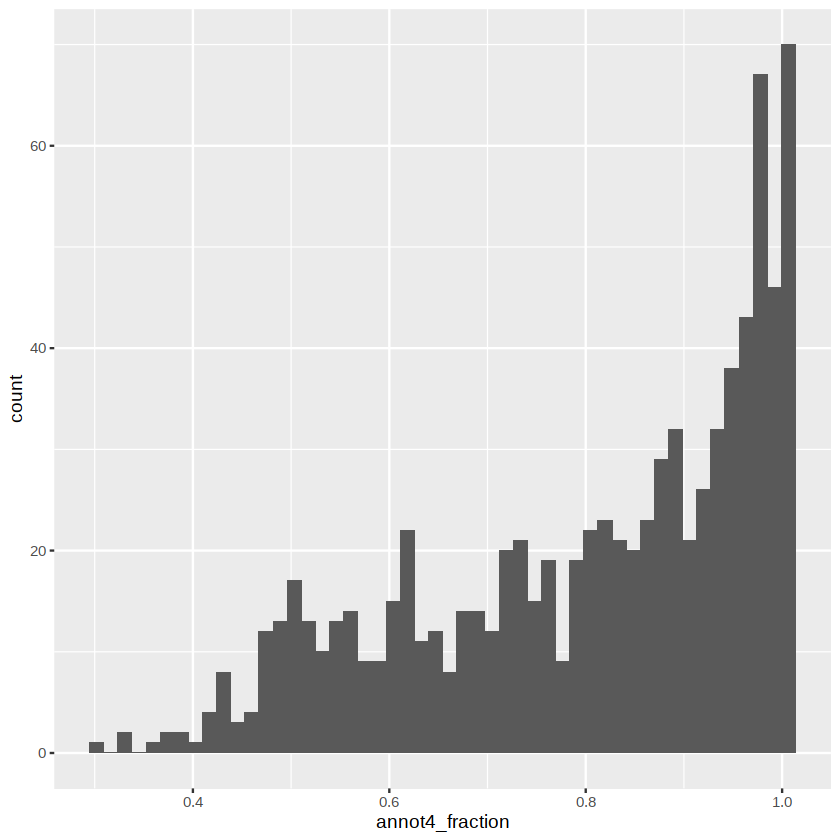

In [24]:
ggplot(da_results, aes(annot4_fraction)) + geom_histogram(bins=50)

In [25]:
dim(da_results)

[1] 862   9

In [26]:
da_results$annot4 <- ifelse(da_results$annot4_fraction < 0.7, "Mixed", da_results$annot4)

Converting group.by to factor...



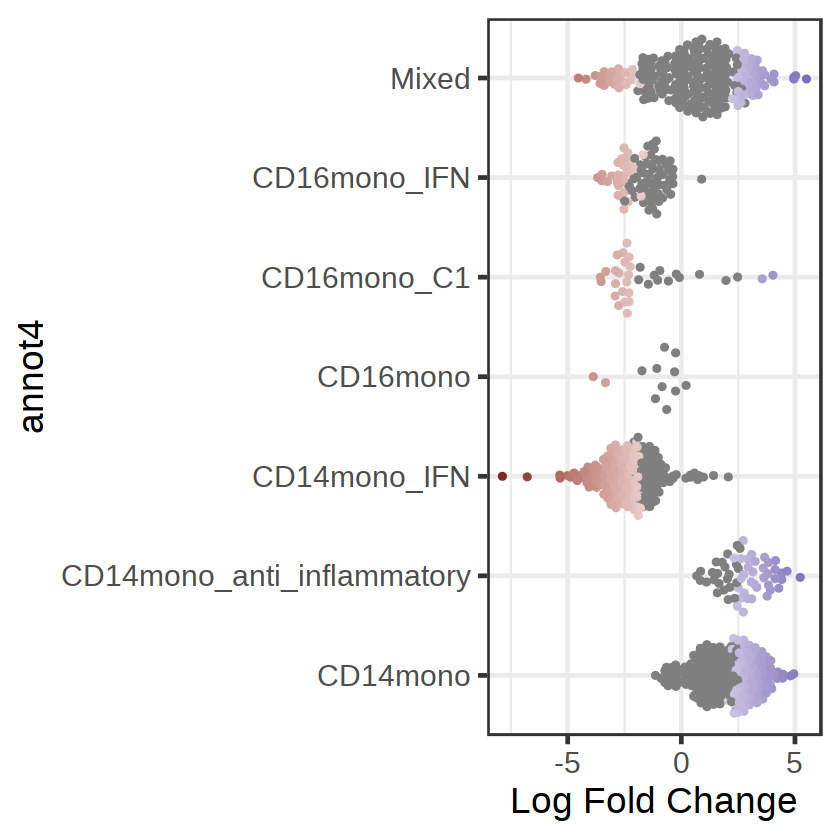

In [27]:
p <-plotDAbeeswarm(da_results, group.by = "annot4")
p

In [35]:
png(filename="/home/jovyan/scripts/renal_covid_19/steroid_pipeline/milo_CD14mono_time_from_inf_steroid_pos.png",width=1500, height=1500,res=150)
plot(p)
dev.off()

png 
  2

In [28]:
saveRDS(data_milo, file = "/home/jovyan/scripts/renal_covid_19/steroid_pipeline/steroid_pos_only_milo.rds")

In [29]:
write.csv(da_results,"/home/jovyan/scripts/renal_covid_19/steroid_pipeline/steroid_pos_only_milo.csv", row.names = FALSE)
